# Módulo 1: Descarga y Exploración del Corpus

En esta primera etapa, nos dedicaremos a descargar el Dataset que estaremos utilizando a lo largo de todo el proyecto. Lo que haremos en este punto será explorar la data para asegurarnos de conocer cuales son los preprocesamientos que deberemos de llevar a cabo en etapas posteriores.

In [ ]:
# En primer lugar, hacemos los imports necesarios
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El dataset que estaremos utilizando para el proyecto habita en un archivo en formato json, por esta razón vamos a crear una función que nos permitirá leer y estudiar su contenido en python.

In [ ]:
# Definimos la función
def json2python(file):

  #Abrimos el json
  with open(file, "r") as f:

    # inicializamos el super diccionario que guardará todos los diccionarios que iremos definiendo más adelante
    json_dicts = []

    # Creamos el bucle "for" que se encargará de definir esos diccionarios e irlos guardando en el super diccionario
    for registro in f:
      diccionario = json.loads(registro)
      json_dicts.append(diccionario)
    
    # Cerramos el json
    f.close()

    # Devolvemos el super diccionario ya listo
    return json_dicts

Ahora verificaremos que la función realiza su trabajo correctamente.

In [ ]:
# inicializamos una variable para asignarle el super diccionario devuelto por la función
corpus = json2python('Musical_Instruments_5.json')

# Vemos el primer registro del corpus
print(corpus[0])

# Vemos el tamaño del corpus
print(len(corpus))

{'overall': 5.0, 'verified': True, 'reviewTime': '10 30, 2016', 'reviewerID': 'A3FO5AKVTFRCRJ', 'asin': '0739079891', 'reviewerName': 'francisco', 'reviewText': "It's good for beginners", 'summary': 'Five Stars', 'unixReviewTime': 1477785600}
231392


Ahora vamos a crear el Pandas DataFrame que nos permitirá explorar los datos más facilmente.

In [ ]:
# Creo el dataframe con el contenido del corpus
dfcorpus = pd.DataFrame(corpus)

# Verificamos que la creación ha ocurrido correctamente haciendo un primer vistazo del DataFrame
dfcorpus.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN


Podemos observar que los campos más importantes a la hora de realizar este proyecto de Supervised Sentiment Analysis son los campos "reviewText" y "overall", pues estos contienen los diferentes reviews y sus calificaciones. Estudiemos el campo "overall" para conocer su escala...

In [ ]:
# Observamos los valores únicos del campo "overall"
dfcorpus['overall'].unique()

array([5., 4., 1., 3., 2.])

Como hemos observado en el primer vistazo del DataFrame y al seleccionar los valores únicos del campo "overall", podemos señalar que este se encuentra en una escala de 1 a 5, siendo 1 la peor calificación y 5 la mejor.

Ahora, como ya sabemos que los únicos campos que nos interesan para el Supervised Sentiment Analysis son el campo "overall" y "reviewText", vamos a proceder a eliminar los demás.

In [ ]:
# Redactamos en una lista las columnas que queremos borrar
columns2drop = ['verified','reviewTime','reviewerID','asin','reviewerName','summary','unixReviewTime','vote','style','image']

# Procedemos a eliminar las columnas no necesarias
dfcorpus.drop(columns2drop, axis=1, inplace=True)

# Nos aseguramos que la instrucción se ha ejecutado correctamente
dfcorpus.head()

,overall,reviewText
0,5.0,It's good for beginners
1,5.0,I recommend this starter Ukulele kit. I has e...
2,5.0,G'daughter received this for Christmas present...
3,4.0,"According to my order history, I bought this t..."
4,1.0,Please pay attention better than I did to the ...


Ahora verificaremos las informaciones generales del DataFrame.

In [ ]:
dfcorpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231392 entries, 0 to 231391
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     231392 non-null  float64
 1   reviewText  231344 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.5+ MB


Como podemos ver, los Dtypes están como se supone que deben estar, sin embargo, el campo reviewText tiene algunos valores nulos. Por suerte son pocos, así que vamos a proceder a eliminar esos registros.

In [ ]:
# Eliminamos los registros con missing values
dfcorpus.dropna(inplace=True)

# Nos aseguramos que el proceso se ha ejecutado correctamente
dfcorpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231344 entries, 0 to 231391
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     231344 non-null  float64
 1   reviewText  231344 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.3+ MB


### Cardinalidad del Vocabulario

In [ ]:
# Primero hacemos los imports necesarios
from sklearn.feature_extraction.text import CountVectorizer

# Luego creamos una variable con la información del campo reviewText
text = dfcorpus['reviewText']

# Inicializamos el objeto
vectorizer = CountVectorizer()

# Ajustamos a la variable creada
vectorizer.fit(text)

# Mostramos la cardinalidad del vocabulario
print(f'Cardinalidad del vocabulario: {len(vectorizer.vocabulary_)}')

Cardinalidad del vocabulario: 73323


### Distribución de reviews por número de estrellas

<AxesSubplot:title={'center':'Reviews Distribution'}, xlabel='Overall', ylabel='Count'>

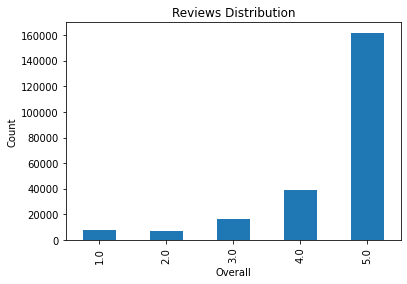

In [ ]:
# Creamos una variable que va a poseer la cantidad de reviews por categoria
catCounts = dfcorpus['overall'].value_counts().sort_index()

# Hacemos un gráfico de barras para mostrar la distribución
catCounts.plot(kind='bar', xlabel='Overall', ylabel='Count', title='Reviews Distribution')

De este gráfico podemos destacar que hay muchos reviews de categoría 5, sin embargo los reviews para las otras categorías son muy pocos. Esto significa que el Dataset está desbalanceado... Probablemente será un problema para el entrenamiento del algoritmo. Más adelante veremos como podemos trabajarlo a pesar de este inconveniente.

### Número de reviews positivas y negativas

Debido al desbalance observado anteriormente, se ha decidido unir los reviews de las categorias 1-4 en una sola nueva categoría (reviews negativas) y dejar la categoría 5 como una sola categoría (reviews positivas). Esto con el objetivo de reducir el desbalance presente.

In [ ]:
# Sobreescribimos la columna overall para convertirlo en un campo binario donde:
# Calificación 1-4 se convierte en 0
# Calificación 5 se convierte en 1
dfcorpus['overall'] = np.where(dfcorpus['overall']==5, 1, 0)

# Nos aseguramos que el cambio ha ocurrido exitosamente
dfcorpus.head()

,overall,reviewText
0,1,It's good for beginners
1,1,I recommend this starter Ukulele kit. I has e...
2,1,G'daughter received this for Christmas present...
3,0,"According to my order history, I bought this t..."
4,0,Please pay attention better than I did to the ...


Depsués de haber realizado esta modificación preliminar, ahora sí podemos contabilizar las reviews positivas y las reviews negativas.

In [ ]:
# Creamos las variables que atesorarán el conteo de las reviews
cantReviewsPositivas = len(dfcorpus[dfcorpus['overall']==1])
cantReviewsNegativas = len(dfcorpus[dfcorpus['overall']==0])

# Mostramos la cantidad de reviews positivas y la cantidad de reviews negativas
print(f'Número de reviews positivas: {cantReviewsPositivas}')
print(f'Número de reviews negativas: {cantReviewsNegativas}')

Número de reviews positivas: 161798
Número de reviews negativas: 69546


### N-grams más frecuentes

In [ ]:
# Inicializamos el objeto con el objetivo de crear unigramas y bigramas
vectorizer = CountVectorizer(ngram_range=(1,2))

# Transformamos en una matriz esparza para poder contar cuantas veces aparece cada palabra
fit = vectorizer.fit_transform(dfcorpus['reviewText'])

# Sumamos la cantidad de veces que aparece cada característica
conteo = fit.sum(axis=0)

# Aplanamiento de la matriz esparza formada para poder ser procesada
conteo_aplanado = np.squeeze(np.asarray(conteo))

# Organizamos los índices en orden descendente para mostrar las más frecuentes primero
indices_descendentes = np.argsort(conteo_aplanado)[::-1]

# Implementamos un bucle "for" para visualizar los resultados
top_ngrams = []
for i in indices_descendentes[:10]:
  palabraYconteo = (vectorizer.get_feature_names_out()[i], conteo_aplanado[i])
  top_ngrams.append(palabraYconteo)

# Visualizamos los resultados
print('Top 10 N-grams más frecuentes:')
print(top_ngrams)

Top 10 N-grams más frecuentes:
[('the', 635563), ('and', 372126), ('it', 323505), ('to', 320234), ('is', 198905), ('for', 196633), ('of', 187429), ('this', 175390), ('my', 136506), ('you', 135893)]


### Nubes de palabras

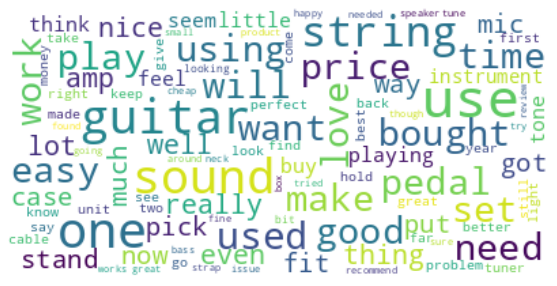

In [ ]:
# En primer lugar, hacemos los imports necearios
from wordcloud import WordCloud

# Nos aseguramos que todos los reviews estén unidos en un solo texto para poder hacer el wordcloud
catText = dfcorpus['reviewText'].str.cat(sep=' ')

# inicializamos la instancia wordcloud
wc = WordCloud(background_color='white', max_words=100, max_font_size=40).generate(catText)

# Usamos matplotlib.pyplot para dibujar el el objeto
plt.figure(figsize=(10,5))
plt.imshow(X=wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Visualización de algunos word embeddings con Word2Vec

In [ ]:
# En primer lugar, hacemos los imports necesarios
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Usamos un bucle "for" para crear la lista que atesorará todas las palabras de los reviews
listaPalabras = []
for review in dfcorpus['reviewText']:
  palabras = review.split()
  listaPalabras.append(palabras)

# Hiperparametrizamos el modelo
model = Word2Vec(listaPalabras, size=100, sample=6e-3, window=5, min_count=5, workers=4)

# Seleccionaremos 4 palabras para encontrar el top 10 más similares
# Las palabras a seleccionar serán: [good, love, issue, cheap]
selectedWords = ['good','love','issue','cheap']

# Creamos la comprensión de diccionarios que nos permitirá encontrar el top 10 palabrás más similares
closeWords = {palabra: [palabra_similar[0] for palabra_similar in model.wv.most_similar(palabra, topn=10)] for palabra in selectedWords}

# Convertimos los word embeddings en un array 2D con TSNE
tsne = TSNE(n_components=2, random_state=42)
vector2d = tsne.fit_transform(model.wv.vectors)

# Hacemos el bucle "for" que nos dibujará el gráfico
plt.figure(figsize=(12,10))
for i, palabra in enumerate(closeWords.keys()):
  x = vector2d[i*10:(i+1)*10, 0]
  y = vector2d[i*10:(i+1)*10, 1]
  plt.scatter(x,y)
  for j, palabra_similar in enumerate(closeWords[palabra]):
    plt.annotate(closeWords, xy=(x[j], y[j]))
plt.show()

KeyboardInterrupt: ignored

### Conclusiones de la Exploración

Podemos concluir que tratamos con un Dataset desbalanceado, ya que tenemos muchas reviews positivas y pocas negativas. Pudimos manejar un poco el desbalance tratando todas las reviews con menos de 5 estrellas como reviews negativas. Más adelante veremos como podemos seguir trabajando con los datos para mejorar la calidad de la información.

In [ ]:
# Guardo el DataFrame en un archivo csv para poder utilizarlo en las partes posteriores
dfcorpus.to_csv('MusicalInstruments.csv', index=False)